# 7. 워드 임베딩

7-1. 들어가며<br>
7-2. 벡터화<br>
7-3. 벡터화 실습: 원-핫 인코딩 구현해보기<br>
7-4. 워드 임베딩<br>
7-5. Word2Vec (1) 분포 가설<br>
7-6. Word2Vec (2) CBoW<br>
7-7. Word2Vec (3) Skip-gram과 Negative Sampling<br>
7-8. Word2Vec (4) 영어 Word2Vec 실습과 OOV 문제<br>
7-9. 임베딩 벡터의 시각화<br>
7-10. FastText<br>
7-11. GloVe<br>
7-12. 마무리하며

---

### Keyword

1. Vectorization
    1. BoW
    2. DTM
    3. TF-IDF
    4. One-Hot Encoding
2. One-Hot Encoding
    1. 그냥 구현
    2. keras 이용
3. Word Embedding
    1. NPLM
    2. Word2Vec
    3. FastText
    4. Glove
4. Word2Vec
    1. 분포 가설
    2. CBoW
    3. Skip-gram, Negative sampling -> CBoW 다중분류의 문제점을 이중분류문제로 바꿔서 해결
    4. OOV문제 ~ FastText
5. FastText
6. GloVe
    1. word embedding 접근법 두가지
        1. 카운트 기반 : DTM, LSA
        2. 예측 기반 : Word2Vec
        3. 둘 다 : GloVe
    2. Window based Co-occurrence Matrix
    3. Co-occurrence Probability
    4. GloVe loss function

## 7-1. 들어가며
---

### 학습 목표
---
- **원-핫 인코딩**을 구현할 수 있습니다.
- `CBoW`, `Skip-gram` 두 가지 방법을 설명할 수 있습니다.
- **네거티브 샘플링(Negative Sampling)**이 무엇인지 설명할 수 있습니다.
- `FastText`, `GloVe` 특징을 설명할 수 있습니다.

## 7-2. 벡터화
---
### Bag of words / DTM(Document-Term Matrix)
- Bag of words : 단어의 순서를 고려하지 않고, 단어의 등장 빈도(frequency)만을 고려해서 단어를 벡터화하는 방법
    - 사용할 때 주로 불필요한 단어를 제거하거나 표현은 다르지만 같은 단어를 통합시켜주는 정규화와 같은 전처리 
    - : 단어를 카운트하는 방법론이기 때문에 불필요한 카운트는 미리 배제하는 것이 좋기 때문
    
- Out of Vocabulary 문제 : 단어장(사전)에 없는 단어에 대처할 수 없어 난감한 문제
- DTM(문서 단어 행렬, Document-Term Matrix) : Bag of words를 사용하여 문서 간 유사도를 비교하기 위한 행렬. 문서를 행으로, 단어를 열로 구성
    - 희소 벡터(sparse vector) : DTM의 문서 벡터나 단어 벡터는 대부분의 값이 0 
- 단어장(vocabulary, V) : 자연어 처리에서 중복 카운트는 배제한 단어들의 집합(set)

### TF-IDF
 : 단어마다 중요 가중치를 다르게 주는 방법
 
- TF-IDF와 DTM이 가지는 공통점 : 
    - 문서 벡터의 크기가 단어장 의 크기인 V이고, 
    - 문서 벡터와 단어 벡터 둘 다 여전히 희소 벡터

### 원-핫 인코딩(one-hot encoding)
: 모든 단어의 관계를 독립적으로 정의

1. 우선 갖고 있는 텍스트 데이터에서 단어들의 집합인 단어장(vocabulary) 을 만듭니다. 
2. 그 후 단어장에 있는 모든 단어에 대해서 1부터 V까지 고유한 정수를 부여
    - 이 정수는 단어장에 있는 각 단어의 일종의 인덱스 역할
3. 각 단어는 V차원의 벡터로 표현되는데, 해당 단어의 인덱스 위치만 1이고 나머지는 전부 0의 값을 가지는 벡터가 됩니다

- 예시:
>문서 1 : 강아지, 고양이, 강아지<br>
문서 2 : 애교, 고양이<br>
문서 3 : 컴퓨터, 노트북
|단어|인덱스|원-핫 벡터|
|:---|:---|:---|
강아지 | 1번| `[1, 0, 0, 0, 0]` |
고양이 | 2번|`[0, 1, 0, 0, 0]`|
애교 | 3번|`[0, 0, 1, 0, 0]`|
컴퓨터 | 4번|`[0, 0, 0, 1, 0]`|
노트북 | 5번|`[0, 0, 0, 0, 1]`|
- 원-핫 인코딩을 통해 얻은 벡터를 **원-핫 벡터(one-hot vector)** 라고 합니다.
- 여기서는 정수를 1부터 부여한다고 가정했지만, 실제로는 0번 단어를 사용하기도 하고, 인덱스도 0번부터 시작하기도 한답니다.

- `TF(Term Frequency)`란 문장을 구성하는 단어들의 원-핫 벡터들을 모두 더해서 문장의 단어 개수로 나눈 것과 같습니다.


## 7-3. 벡터화 실습: 원-핫 인코딩 구현해보기

Step 1. 패키지 설치하기<br>
Step 2. 전처리 이야기<br>
Step 3. 토큰화 이야기<br>
Step 4. 단어장 만들기<br>
Step 5: 원-핫 벡터 만들기<br>
케라스를 통한 원-핫 인코딩(one-hot encoding)

---


### Step 1. 패키지 설치
- 한국어로 실습하기 위해서 한국어 형태소 분석기 패키지 KoNLPy가 필요
- cloud 사용자는 이미 설치되어 있으니 명령어만 참고로 알아두세요.

In [2]:
!pip install konlpy

In [1]:
# 필요한 도구 import
import re
from konlpy.tag import Okt
from collections import Counter
print("임포트 완료")

임포트 완료


In [2]:
# text example
text = "임금님 귀는 당나귀 귀! 임금님 귀는 당나귀 귀! 실컷~ 소리치고 나니 속이 확 뚫려 살 것 같았어."
text

'임금님 귀는 당나귀 귀! 임금님 귀는 당나귀 귀! 실컷~ 소리치고 나니 속이 확 뚫려 살 것 같았어.'

### Step 2. 전처리 (특수문자 제거)

**`정규 표현식`** : 문자열을 처리할 때 사용하는 기법으로, 파이썬만의 고유 문법이 아니라 문자열을 처리하는 모든 곳에서 사용

- 정규 표현식을 사용하여 특수문자들을 제거
    - 정규 표현식으로 한국어의 범위를 지정할 수 있어야 합니다. 
    - 일반적으로 
        - 자음의 범위는 `'ㄱ ~ ㅎ'`, 
        
        - 모음의 범위는 `'ㅏ ~ ㅣ'` 와 같이 지정할 수 있습니다. 
        
    - 완성형 한글의 범위는 `'가 ~ 힣'`과 같이 사용
    
해당 범위 내에 어떤 자음과 모음이 속하는지 알고 싶다면 아래의 링크를 참고하시기 바랍니다.
#### 참고링크
- [Hangul Compatibility Jamo](https://www.unicode.org/charts/PDF/U3130.pdf)
- [Hangul Syllables](https://www.unicode.org/charts/PDF/UAC00.pdf)

한글과 공백을 제외하고 모든 문자를 표현하는 정규 표현식: `[^ㄱ-ㅎㅏ-ㅣ가-힣 ]`



In [3]:
# 정규 표현식을 반영하여 전처리를 수행
reg = re.compile("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]")
text = reg.sub('', text)
print(text)

임금님 귀는 당나귀 귀 임금님 귀는 당나귀 귀 실컷 소리치고 나니 속이 확 뚫려 살 것 같았어


### Step 3. Tokenize

단어장을 구성하기 위해서는 단어장의 원소인 토큰(token)이라는 단위를 정해줄 필요가 있습니다. <br>
그리고 한국어는 주로 
- 형태소 분석기를 통해서 토큰 단위를 나눠줍니다. 여기서는 
- [KoNLPy에 내장된 Okt 형태소 분석기](https://konlpy.org/en/latest/api/konlpy.tag/#okt-class)를 사용해보겠습니다.


In [4]:
# 토큰 분리
okt = Okt()
tokens = okt.morphs(text)
print(tokens)

['임금님', '귀', '는', '당나귀', '귀', '임금님', '귀', '는', '당나귀', '귀', '실컷', '소리', '치고', '나니', '속이', '확', '뚫려', '살', '것', '같았어']


### Step 4. 단어장 만들기
- 빈도수가 높은 단어일수록 낮은 정수를 부여
- 각 단어의 빈도수를 카운트 : python `Counter` subclass 사용 (https://docs.python.org/3/library/collections.html#collections.Counter)
    - 단어가 키(key)로, 단어에 대한 빈도수가 값(value)으로 저장
    - vocab에 단어를 입력하면 빈도수를 리턴
    - `most_common()` : 상위 빈도수를 가진 단어를 주어진 수만큼 리턴


In [6]:
vocab = Counter(tokens)
print(vocab)
type(vocab)

Counter({'귀': 4, '임금님': 2, '는': 2, '당나귀': 2, '실컷': 1, '소리': 1, '치고': 1, '나니': 1, '속이': 1, '확': 1, '뚫려': 1, '살': 1, '것': 1, '같았어': 1})


collections.Counter

In [7]:
vocab['임금님']

2

In [8]:
# 등장 빈도 수 상위 5개의 단어만 단어장으로 저장
'''
most_common() : 상위 빈도수를 가진 단어를 주어진 수만큼 리턴
'''
vocab_size = 5
vocab = vocab.most_common(vocab_size)
print(vocab)

[('귀', 4), ('임금님', 2), ('는', 2), ('당나귀', 2), ('실컷', 1)]


In [9]:
# 높은 빈도수를 가진 단어일수록 낮은 정수 인덱스를 부여
word2idx={word[0] : index+1 for index, word in enumerate(vocab)}
print(word2idx) # 최종 단어장

{'귀': 1, '임금님': 2, '는': 3, '당나귀': 4, '실컷': 5}


### Step 5: 원-핫 벡터 만들기

In [10]:
# 특정 단어와 단어장을 입력하면 해당 단어의 원-핫 벡터를 리턴하는 함수
def one_hot_encoding(word, word2index):
       one_hot_vector = [0]*(len(word2index)) # 벡터 크기 지정
       index = word2index[word] # 입력한 단어 value return
       one_hot_vector[index-1] = 1 # 해당하는 단어 인덱스 one hot encoding
       return one_hot_vector
print("슝=3")

슝=3


In [12]:
one_hot_encoding("임금님", word2idx)

[0, 1, 0, 0, 0]

### 케라스를 통한 원-핫 인코딩(one-hot encoding)
- 단어장을 만드는 역할을 해주는 케라스 `Tokenizer`와 
- 원-핫 인코딩을 위한 도구인 `to_categorical`을 사용

In [13]:
# import
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [14]:
# 예시 문서 
text = [['강아지', '고양이', '강아지'],['애교', '고양이'], ['컴퓨터', '노트북']]
text

[['강아지', '고양이', '강아지'], ['애교', '고양이'], ['컴퓨터', '노트북']]

In [15]:
# keras Tokenizer -> 텍스트로부터 단어장을 만들고, 단어장의 각 단어에 고유한 정수를 맵핑
t = Tokenizer()
t.fit_on_texts(text)
print(t.word_index) # 각 단어에 대한 인코딩 결과 출력.

{'강아지': 1, '고양이': 2, '애교': 3, '컴퓨터': 4, '노트북': 5}


In [16]:
# 단어장의 크기를 vocab_size라는 변수에 저장
vocab_size = len(t.word_index) + 1
print("슝=3")

슝=3


vocab_size를 구할 때 1을 더해주는 이유: 실제로 자연어 처리를 할 때는 `0번 단어`가 `특별 토큰`으로 `단어장에 추가`되는 경우가 많기 때문입니다. 

주로 0번은 패딩(padding) 작업을 위한 패딩 토큰으로 사용되는데, 여기서는 0번 단어도 고려해주는 것이 좋다는 정도로만 이해하고 `word_index`에 1을 더해서 단어장의 크기를 저장하겠습니다. 이제 `vocab_size`는 **6**이 되었습니다.

케라스 토크나이저에 단어장이 저장되었으므로, 단어장에 속한 단어들로 구성된 `텍스트 시퀀스`는 `케라스 토크나이저`를 통해 `정수 시퀀스`로 변환할 수 있습니다.

In [17]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
sub_text = ['강아지', '고양이', '강아지', '컴퓨터']
encoded = t.texts_to_sequences([sub_text])
print(encoded)

[[1, 2, 1, 4]]


In [18]:
# 정수 시퀀스를 to_categorical()을 사용해 원-핫 벡터의 시퀀스로 변환
one_hot = to_categorical(encoded, num_classes = vocab_size)
print(one_hot)

[[[0. 1. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0.]]]


## 7-4. 워드 임베딩
---

### 차원의 저주(curse of dimensionality) 

같은 정보를 저차원과 고차원에 각각 표현한다고 해 보죠. 저차원에서는 정보의 밀도가 상대적으로 커지지만, 고차원에서는 정보가 흩어지며 밀도가 작아질 거예요. 

정보 밀도가 작아지는 것, 즉 차원이 커지는 것과 머신 러닝 모델의 성능에는 어떤 연관 관계가 있습니다. 차원의 저주에 대해서는 아래 참고자료를 통해 개념을 정리해 봅시다.

- [빅데이터: 큰 용량의 역습 – 차원의 저주 (Curse of dimensionality)](http://thesciencelife.com/archives/1001)


### 원-핫 벡터가 가지는 문제점
1. 희소벡터의 문제점: 차원의 저주
2. 유사도 고려 못함 -> 모든 벡터가 서로 orthogonal ~ inner product = 0 : 상호 유사도가 0

이에 대한 대안으로 
- '기계가 단어장 크기보다 적은 차원의 밀집 벡터(dense vector)를 학습'하는 **워드 임베딩(word embedding)**

이 제안되었습니다. 
이를 통해 얻는 밀집 벡터는 
- 각 차원이 0과 1이 아닌 다양한 실숫값을 가지며, 
- 이 밀집 벡터를 `임베딩 벡터(embedding vector)` 라고 합니다.

### 워드 임베딩(Word Embedding)

원-핫 인코딩처럼 한 단어를 벡터로 만드는데 그 단어의 정보가 축약된 벡터로 만들어줌. 

 단어가 갖는 특성을 계산할 수 있는 방법
 
- 단어 사이의 관계나 
- 문장에서 단어가 갖는 특징을 
- 수식으로 나타내고 계산해서 정확한 숫자로 나타내도록 하는 거죠. 

이 값이 클수록(또는 작을 수록) 적합한 표현이라고 객관적으로 판단할 수 있게 말이에요. 

여기서 사용되는 방법이나 수식은 꽤 다양합니다. 저마다 더 훌륭한 방법을 생각해 내는 것이죠.

앞서 말한 
- 내적을 활용하는 방법을 예로 들어도 좋습니다. 
- 비슷한 의미를 가진 두 단어의 내적이 클수록 잘 변환된 벡터라고 판단하는 거죠. 
- 그러면 
    - 비슷한 단어의 내적은 커지고 
    - 반대되는 단어의 내적은 작아지도록 만드는 식을 통해 벡터를 계산해 낼 수 있습니다. 
    
이렇게 알아보기 쉬운 단순한 방법을 쓰면 좋겠지만 안타깝게도 실제로 벡터 변환에 이용되는 방법들은 주로 
- 통계학에 기반을 둔 복잡한 식을 활용합니다.

또, 시간이 흘러 이제는 인공 신경망을 이용한 방법이 많이 사용되는데요.
- 인공 신경망을 학습해가는 과정을 이용해 벡터의 값을 조정해 가는 방법

입니다. 우선 
1. 무작정 단어의 적합성이나 유사도를 계산해 보고 그 값이 커져야 하는지 작아져야 하는지 따져봅니다. 
2. 그런 후 단어 벡터의 값을 조금씩 바꿔 갑니다. 마치 딥러닝에서 손실 값을 이용해 가중치를 바꿔 가듯이 단어 벡터의 값을 조금씩 바꿔 가는 거죠. 
3. 이렇게 반복해 학습이 끝나면 단어가 들어가야 할 위치나 의미에 맞게 단어 벡터의 값이 결정됩니다.

에를 들면 아래처럼 단어 벡터가 결정이 될 수 있겠죠.
```
//      [둥근,빨간,단맛,신맛]
사과  : [0.8, 0.7, 0.7, 0.1] // 0.8만큼 둥글고, 0.7만큼 빨갛고, 0.7만큼 달고, 0.1만큼 신 것은 사과다
바나나: [0.1, 0.0, 0.8. 0.0] // 0.1만큼 둥글고, 0.0만큼 빨갛고, 0.8만큼 달고, 0.0만큼 신 것은 바나나다
귤    : [0.7, 0.5, 0.6, 0.5] // 0.7만큼 둥글고, 0.5만큼 빨갛고, 0.6만큼 달고, 0.5만큼 신 것은 귤이다
```

#### 결론적으로 워드 임베딩에서 중요한 것은 두 가지
1. 한 단어를 길이가 비교적 짧은 밀집 벡터로 나타낸다.
2. 그런데 이 밀집 벡터는 단어가 갖는 의미나 단어 간의 관계 등을 어떤 식으로든 내포하고 있다.

이렇게 만들어진 밀집 벡터를 임베딩 벡터

---

임베딩 벡터의 값은
- 훈련 데이터로부터 어떤 모델을 학습하는 과정에서 '자동'으로 얻어지는데, 주로 언어 모델(Language Model)을 학습하는 가운데 얻어짐.

워드 임베딩은 2003년 요슈아 벤지오(Yoshua Bengio) 교수가 [NPLM(Neural Probabilistic Language Model)](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf) 이란 모델을 통해 제안
- 너무 느림 

2013년 구글은 NPLM을 개선하여 정밀도와 속도를 향상시킨 `Word2Vec` 을 제안했죠. 

Word2Vec 이후로 `FastText` 나 `GloVe` 등과 같은 임베딩 방법이 추가로 제안되었답니다. 

여기서는 방금 언급한 이 세 가지 방법에 대해서 배워보겠습니다. 우선 Word2Vec에 대해서 알아볼까요?

### Embedding 방법:
1. Word2Vec
2. FastText
3. GloVe


## 7-5. Word2Vec (1) 분포 가설

Word2Vec은 단어를 벡터로 표현하는 방법의 일종으로 **저차원**으로 이루어져 있고, 단어의 의미를 **여러 차원에 분산하여 표현한 벡터**입니다.
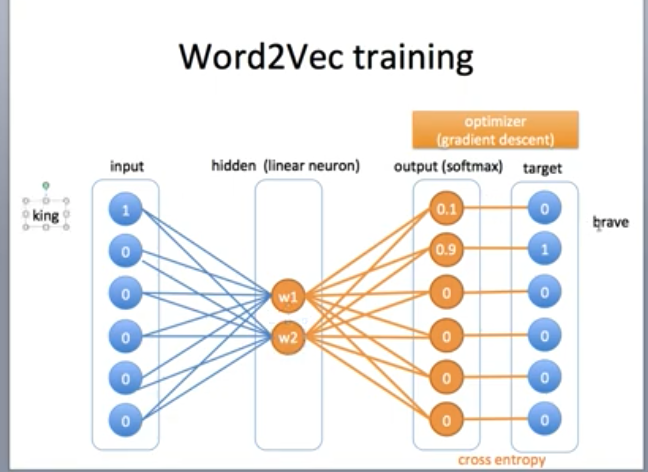

---

### 분포 가설(distributional hypothesis)
> 분포 가설(distributional hypothesis) : ‘비슷한 문맥에서 같이 등장하는 경향이 있는 단어들은 비슷한 의미를 가진다.’
>- You shall know a word by the company it keeps (곁에 오는 단어들을 보면 그 단어를 알 수 있다).

분포 가설에 따르는 Word2Vec은 같이 등장하는 경향이 적은 단어들에 비해 '강아지', '애교, '귀여운'과 같은 단어들을 상대적으로 유사도가 높은 벡터로 만듭니다.

## 7-6. Word2Vec (2) CBoW
---
Word2Vec에는 크게 두 가지 방법:
1. `CBoW`: 주변에 있는 단어들을 통해 중간에 있는 단어들을 예측하는 방법
2. `Skip-gram`: 중간에 있는 단어로 주변 단어들을 예측하는 방법

### CBoW(Continuous Bag of words)

: text가 주어졌을 때 
1. 그 텍스트의 단어 하나하나를 중심단어(center word)로 지정, 
2. center 주변 몇 개의 단어(context word)를 볼 건지 window (window_size = m, 보는 단어는 2m개)설정, window마다 하나의 데이터셋, on-hot encoding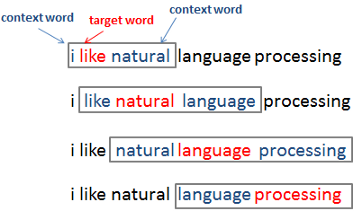
3. sliding하면서 embedding에 사용될 데이터 셋 만들어내서 
4. 임베딩 레이어에 적용:<br>
    1. input(V개) 
    2. embedding_weight_matrix1(W: V x N) -> 룩업 테이블(lookup table) -> average -> hidden input<br>
        - 룩업 테이블을 거쳐서 생긴 2m개의 주변 단어 벡터들은 각각 N의 크기를 가집니다. CBoW에서는 이 **벡터들을 모두 합하거나, 평균을 구한 값 을 최종 은닉층의 결과**로 합니다. 그러면 최종 은닉층의 결과도 N차원의 벡터가 되겠죠. 이게 은닉층 연산의 전부입니다. Word2Vec에서는 은닉층에서 활성화 함수나 편향(bias)을 더하는 연산을 하지 않습니다.
    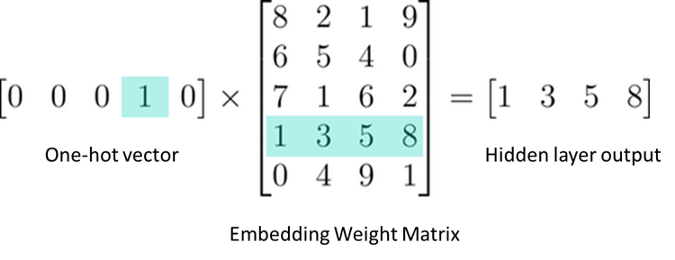<br>
    3. hidden(projection layer: activ_fn이 없음) : (N, hyperparameter)<br>
    4. weight_matrix2(W': N x V) 
    5. -> softmax -> output(V개) <br>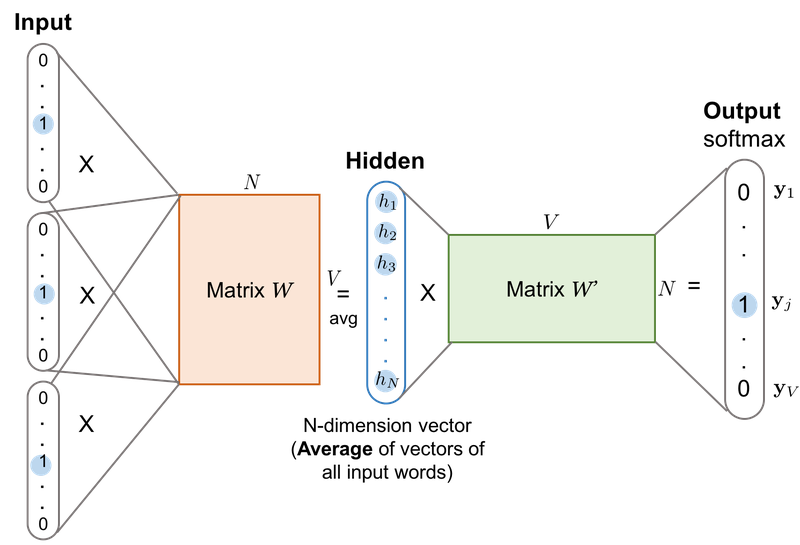
5. back_prop: W, W' update
5. CBoW는 이 **출력층의 벡터를 중심 단어의 원-핫 벡터와의 손실(loss)을 최소**화 하도록 학습

이 과정에서 
- 첫 번째 가중치 행렬 W와 
- 두 번째 가중치 행렬 W' 가 업데이트되는데, 

학습이 다 되었다면 N차원의 크기를 갖는 
- W의 행이나 
- W' 의 열로부터 

**어떤 것을 임베딩 벡터로 사용할지를 결정**하면 됩니다. <br>
때로는 W와 W' 의 평균치를 임베딩 벡터로 선택하기도 합니다.


#### 한계
: CBoW는 Out-of-vocabulary(단어 집합에 없는 단어), Polysemy(다의어), 문맥 파악의 한계 등이 있습니다.

## 7-7. Word2Vec (3) Skip-gram과 Negative Sampling
http://jalammar.github.io/illustrated-word2vec/

---
### Skip-gram
: 주변으로 중심 예측 
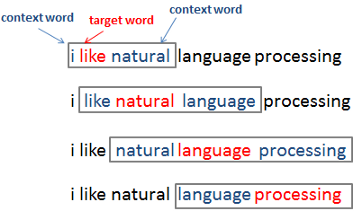
위로부터 얻는 데이터셋 (CBoW랑 다름) : 
- 아래 데이터셋의 형식은 (중심 단어, 주변 단어)임을 가정합니다.
- (i, like) (like, I), (like, natural), (natural, like), (natural, language), (language, natural), (language, processing), (processing, language)

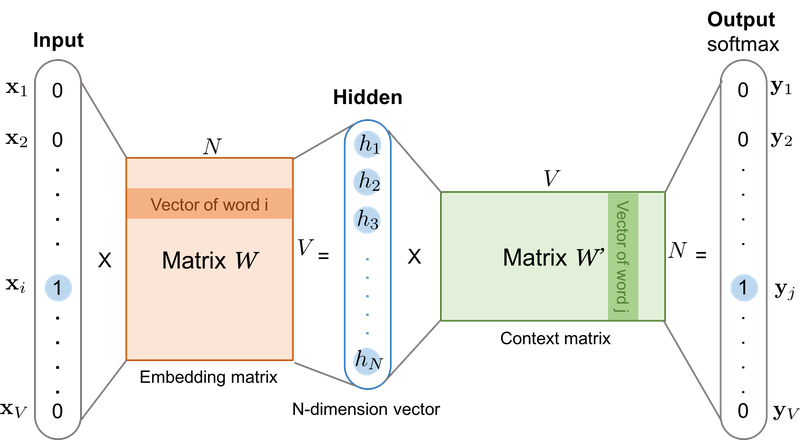

중심 단어로부터 주변 단어를 예측한다는 점, 그리고 **이로 인해 중간에 은닉층에서 다수의 벡터의 덧셈과 평균을 구하는 과정이 없어졌다** 는 점만 제외하면 CBoW와 메커니즘 자체는 동일합니다. skip-gram도 CBoW와 마찬가지로 학습 후에 가중치 행렬 W의 행 또는 W' 의 열로부터 임베딩 벡터를 얻을 수 있습니다.


### 네거티브 샘플링(negative sampling)

대체적으로 Word2Vec를 사용할 때는 `SGNS(Skip-Gram with Negative Sampling)` 을 사용합니다. <br>
즉 Skip-gram을 사용하면서 **네거티브 샘플링(Negative Sampling)** 이란 방법도 사용한다는 거죠! <br>
앞서 배운 Word2Vec의 구조는 **연산량이 지나치게 많아 실제로 사용하기 어렵**거든요.

출력층에서 
- 소프트맥스 함수를 통과한 V 차원의 벡터와 
- 레이블에 해당되는 V차원의 주변 단어의 원-핫 벡터와의 
    1. 오차를 구하고, 
    2. 역전파를 통해 모든 단어에 대한 임베딩 벡터를 조정합니다. 

그 단어가 중심 단어나 주변 단어와 전혀 상관없는 단어라도요. 
- 만약 단어장의 크기가 수십, 수백만에 달한다면 이 작업은 너무너무 느립니다! 
- Output을 위한 소프트맥스(Softmax) 함수의 분모항이 수백만에 달하는 것만 생각해 보아도 충분히 예상할 수 있습니다.

하지만 지금 집중하고 있는 중심 단어와 주변 단어가 '사과', '딸기'와 같이 과일과 관련된 단어라면, '필통', '연필'이라는 연관 관계가 없는 단어들의 임베딩 값을 굳이 업데이트할 필요가 없겠죠? 그래서 

#### **네거티브 샘플링**은 
- 연산량을 줄이기 위해서 
- **소프트맥스** 함수를 사용한 V개 중 1개를 고르는 **다중 클래스 분류 문제** 를 
- **시그모이드** 함수를 사용한 **이진 분류 문제** 로 바꾸기로 합니다.
    - 중심 단어와 주변 단어를 입력값으로 받아 
    - 이 두 단어가 정말로 이웃 관계면(실제로 중심 단어와 주변 단어의 관계면) 
    - 1을 또는 0을 출력하는 문제로 바꾸는 것


**랜덤으로 단어장에 있는 아무 단어나 가져와 target word로** 하는 **거짓 데이터셋**을 만들고 **0으로 레이블링을 해주는 것** 이죠! 

**거짓(negative) 데이터셋을 만들기 때문에 이 방법이 네거티브 샘플링** 이라 불립니다. 아래의 그림은 거짓 데이터셋을 만드는 과정을 보여줍니다.

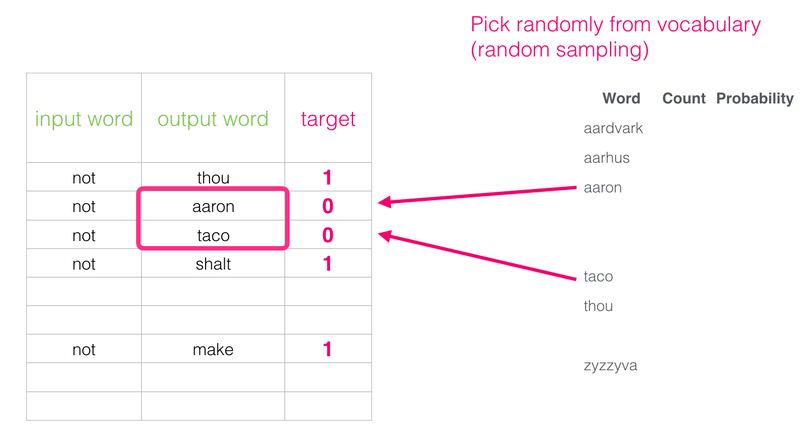


이런 학습 방식은 기존의 소프트맥스 함수를 사용했던 방식보다 상당량의 **연산량을 줄일 수 있는 효과**를 가지고 있습니다! 이 아이디어는 엄청난 연산량을 필요로 했던 Word2Vec의 학습이 가능케 했던 핵심적인 아이디어 중 하나입니다. 다양한 분야에 손쉽게 응용할 수 있는 매력적인 아이디어이므로 잘 알아둡시다.



## 7-8. Word2Vec (4) 영어 Word2Vec 실습과 OOV 문제
---

### 영어 Word2Vec 실습


In [ ]:
# dataset 다운로드
!pip install nltk # 사용할 훈련 데이터는 NLTK에서 제공하는 코퍼스
!pip install gensim # 토픽 모델링을 위한 NLP 패키지. Word2Vec을 별도로 구현할 필요없이 파이썬에서 제공하는 패키지 이용 이미 구현된모델사용가능

In [1]:
# NLTK에 내장된 corpus 다운로드
import nltk
nltk.download('abc')
nltk.download('punkt')

[nltk_data] Downloading package abc to /aiffel/nltk_data...
[nltk_data]   Unzipping corpora/abc.zip.
[nltk_data] Downloading package punkt to /aiffel/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Error with downloaded zip file


False

In [2]:
# NLTK의 코퍼스를 불러와 corpus라는 변수에 저장합니다.
from nltk.corpus import abc
corpus = abc.sents()
print("슝~")

슝~


In [3]:
# corpus loading 확인
print(corpus[:3])

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ['In', 'one', 'of', 'the', 'letters', 'Mr', 'Howard', 'asks', 'AWB', 'managing', 'director', 'Andrew', 'Lindberg', 'to', 'remain', 'in', 'close', 'contact', 'with', 'the', 'Government', 'on', 'Iraq', 'wheat', 'sales', '.']]


In [4]:
print('코퍼스의 크기 :',len(corpus))

코퍼스의 크기 : 29059


In [5]:
# Word2Vec training
from gensim.models import Word2Vec

model = Word2Vec(sentences = corpus, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)
'''
    vector size = 학습 후 임베딩 벡터의 차원
    window = 컨텍스트 윈도우 크기
    min_count = 단어 최소 빈도수 제한 (빈도가 적은 단어들은 학습하지 않아요.)
    workers = 학습을 위한 프로세스 수
    sg = 0은 CBoW, 1은 Skip-gram.
'''
print("모델 학습 완료!")

모델 학습 완료!


Word2Vec는 입력한 단어에 대해서 가장 코사인 유사도가 높은 단어들을 출력하는 model.wv.most_similar를 지원합니다. 

'man'과 가장 유사한 단어들은 어떤 단어들일까요?

In [6]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.9233373999595642), ('skull', 0.911032497882843), ('Bang', 0.9056490063667297), ('asteroid', 0.9051957130432129), ('third', 0.9020178318023682), ('baby', 0.8993921279907227), ('dog', 0.8985978364944458), ('bought', 0.8975234031677246), ('rally', 0.8912491798400879), ('disc', 0.8888981342315674)]


In [7]:
from gensim.models import KeyedVectors

# 모델 저장
model.wv.save_word2vec_format('~/aiffel/word_embedding/w2v') 
# 모델 load
loaded_model = KeyedVectors.load_word2vec_format("~/aiffel/word_embedding/w2v")
print("모델  load 완료!")

모델  load 완료!


In [8]:
# load한 모델 출력 확인 -> 동일
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.9233373999595642), ('skull', 0.911032497882843), ('Bang', 0.9056490063667297), ('asteroid', 0.9051957130432129), ('third', 0.9020178318023682), ('baby', 0.8993921279907227), ('dog', 0.8985978364944458), ('bought', 0.8975234031677246), ('rally', 0.8912491798400879), ('disc', 0.8888981342315674)]


### Word2Vec의 OOV 문제

Word2Vec은 Bag of words 학습 과정에서 언급되었던 문제인 사전에 없는 단어(Out Of Vocabuary) 문제를 그대로 가지고 있습니다. 

다시 말해, 사전에 없는 단어에 대해서 **Word2Vec은 임베딩 벡터값을 얻을 수 없습니다.** 학습된 모델에 모르는 단어를 입력하면 어떻게 될까요?

"overacting"은 과장된 행동을 나타내는 단어입니다. 사실 자주 등장하는 단어는 아닌데요. overacting과 코사인 유사도가 가장 높은 단어를 출력해 볼까요?

In [9]:
# 에러가 나더라도 놀라지 마세요.
loaded_model.most_similar('overacting')

KeyError: "Key 'overacting' not present"

"overacting"은 훈련 데이터에 없는 단어, 다시 말해 단어장에 존재하지 않는 단어므로 이 코드는 에러를 발생

똑같이 오타도 에러

## 7-9. 임베딩 벡터의 시각화
---
구글이 공개한 **임베딩 벡터의 시각화 오픈소스**인 `임베딩 프로젝터(embedding projector)` 를 사용해서 임베딩 벡터들을 시각화



### 필요한 파일 만들기

임베딩 프로젝터를 통해서 임베딩 벡터를 시각화하기 위해서는 **[이미 저장된 모델이 필요](https://radimrehurek.com/gensim/models/word2vec.html)**해요. 이미 저장된 모델로부터 벡터값이 저장된 파일과 메타파일을 얻어야 하거든요. 앞서 `'w2v'`란 이름으로 모델을 저장했었죠? 아래 커맨드를 실행해 보겠습니다.

In [10]:
!python -m gensim.scripts.word2vec2tensor --input ~/aiffel/word_embedding/w2v --output ~/aiffel/word_embedding/w2v

# 해당 커맨드를 수행하면 두 개의 파일이 ~/aiffel/word_embedding 경로에 생성
# - w2v_metadata.tsv와 
# - w2v_tensor.tsv 파일입니다. 다음 커맨드로 확인해보실 수 있습니다.

!ls ~/aiffel/word_embedding/


2024-01-03 08:47:03,757 - word2vec2tensor - INFO - running /opt/conda/lib/python3.9/site-packages/gensim/scripts/word2vec2tensor.py --input /aiffel/aiffel/word_embedding/w2v --output /aiffel/aiffel/word_embedding/w2v
2024-01-03 08:47:03,757 - keyedvectors - INFO - loading projection weights from /aiffel/aiffel/word_embedding/w2v
2024-01-03 08:47:04,456 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (10363, 100) matrix of type float32 from /aiffel/aiffel/word_embedding/w2v', 'binary': False, 'encoding': 'utf8', 'datetime': '2024-01-03T08:47:04.447155', 'gensim': '4.1.2', 'python': '3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:46) \n[GCC 9.4.0]', 'platform': 'Linux-5.15.120+-x86_64-with-glibc2.31', 'event': 'load_word2vec_format'}
2024-01-03 08:47:05,251 - word2vec2tensor - INFO - 2D tensor file saved to /aiffel/aiffel/word_embedding/w2v_tensor.tsv
2024-01-03 08:47:05,251 - word2vec2tensor - INFO - Tensor metadata file saved to /aiffel/aiffel/word_embeddi

이 두 개의 파일을 인터넷 환경에 업로드 할 수 있도록 준비해주세요.(아래의 파일명을 클릭하면 됩니다.)

[w2v_metadata.tsv](https://d3s0tskafalll9.cloudfront.net/media/documents/w2v_metadata.tsv)<br>
[w2v_tensor.tsv](https://d3s0tskafalll9.cloudfront.net/media/documents/w2v_tensor.tsv)

### 임베딩 프로젝터에 tsv 파일 업로드하기

https://projector.tensorflow.org/

- 좌측 상단을 통해 데이터를 업로드
- 시각화 결과를 중앙에서 확인
- 우측에서 거리나 유사도에 대한 파라미터를 조작할 수 있는 구조

1. 좌측 상단의 화면에서 Load라는 버튼을 누릅니다. Load라는 버튼을 누르면 아래와 같은 창이 뜨는데 총 두 개의 Choose file 버튼이 있습니다.
2. 위에 있는 Choose file 버튼을 누르고 w2v_tensor.tsv 파일을 업로드하고, 
3. 아래에 있는 Choose file 버튼을 누르고 w2v_metadata.tsv 파일을 업로드합니다. 
4. 두 파일을 업로드하면 임베딩 프로젝터에 학습했던 워드 임베딩 모델이 시각화됩니다
    - 우측에 `Search 버튼` 또는 `그래프의 포인트를 클릭`해 원하는 단어를 선택하고, 
    - `neighbors`에 몇 개까지의 이웃을 검색할지 선택합니다. 
- `distance`에서 `COSINE` 또는 `EUCLIDEAN`을 통해서 `거리 측정 메트릭`을 코사인 유사도로 할 것인지, 유클리드 거리로 할 것인지 선택할 수 있습니다. 
- 그 외에도 중앙에 있는 화면에 마우스를 통해서 화면을 돌려보며 임베딩 벡터들의 군집을 확인해보세요!

## 7-10. FastText
---
페이스북에서 개발한 `FastText`는 Word2Vec 이후에 등장한 워드 임베딩 방법으로, 
- 메커니즘 자체는 Word2Vec을 그대로 따르고 있지만, 
- 문자 단위 `n-gram(character-level n-gram)` 표현을 학습한다는 점에서 다릅니다. 


- Word2Vec은 단어를 더 이상 깨질 수 없는 단위로 구분하는 반면, 
- FastText는 단어 내부의 내부 단어(`subwords`)들을 학습한다는 아이디어를 가지고 있습니다.

FastText의 n-gram에서 
- n은 단어들이 얼마나 분리되는지 결정하는 하이퍼파라미터입니다. 
- n을 3으로 잡은 트라이그램(tri-gram)의 경우, 
- 단어 "partial"은 'par', 'art', 'rti', 'tia', 'ial'로 분리하고 이들을 벡터로 만듭니다. 
- 더 정확히는 시작과 끝을 의미하는 <, >를 도입하여 
    - `<pa, par, art, rti, tia, ial, al>`라는 
    - 6개의 내부 단어(subword) 토큰을 벡터로 만듭니다. 
    - 여기에 추가적으로 하나를 더 벡터화하는데, 기존 단어에 <, 와 >를 붙인 토큰 `<partial>`입니다.

- 즉 n = 3인 경우, FastText는 단어 partial에 대해 임베딩되는 n-gram 토큰들은 다음과 같습니다.
```
# n = 3인 경우
<pa, par, art, rti, tia, ial, al>, <partial>
```
실제 사용할 때는 
- n의 최솟값과 최댓값으로 범위를 설정

할 수 있는데, 
- `gensim` 패키지에서는 기본값으로 각각 **3과 6으로 설정**되어 있습니다. 

다시 말해 
- 최솟값 = 3, 
- 최댓값 = 6인 경우라면, 

단어 "partial"에 대해서 FastText는 아래 내부 단어들을 벡터화합니다.
```
# n = 3 ~ 6인 경우
<pa, par, art, rti, ita, ial, al>, <par, arti, rtia, tial, ial>, <part, ...중략... , <partial>
```
여기서 **내부 단어들을 벡터화**한다는 의미는 
- 저 단어들 각각에 대해서 Word2Vec을 수행

한다는 의미입니다. 최종적으로 이렇게 벡터화된 **n-gram 벡터들의 총합**을 **해당 단어의 벡터**로 취합니다.



### FastText의 학습 방법

사실 FastText의 학습 방식은 Word2Vec와 크게 다르지 않습니다. FastText도 Word2Vec과 마찬가지로 **네거티브 샘플링**을 사용하여 학습합니다. "(중심 단어, 주변 단어)"의 쌍을 가지고 이 쌍이 포지티브인지 네거티브인지 예측을 진행하는 것이죠. 다만, Word2Vec과 **다른 점**은 <u>학습 과정에서 중심 단어에 속한 문자 단위 n-gram 단어 벡터들을 모두 업데이트</u>한다는 점입니다.

### OOV와 오타에 대한 대응

FastText는 Word2Vec과 달리 **OOV와 오타에 강건하다(robust)** 는 특징이 있습니다. 이는 단어장에 없는 단어라도, **해당 단어의 n-gram이 다른 단어에 존재하면 이로부터 벡터값을 얻는다**는 원리에 기인합니다. 실습을 통해 정말로 강건한지 확인해볼까요?

Word2Vec에서 사용했던 동일한 훈련 데이터를 corpus에 저장했다고 가정합시다. 이를 가지고 FastText를 학습해 볼게요.


In [11]:
from gensim.models import FastText
fasttext_model = FastText(corpus, window=5, min_count=5, workers=4, sg=1)
print("FastText 학습 완료!")

FastText 학습 완료!


 이제 Word2Vec에서 에러가 발생했던 단어들을 FastText 모델에 입력해 보겠습니다. 단어 'overacting'과 코사인 유사도가 가장 높은 단어는 어떤 단어들일까요?

In [12]:
fasttext_model.wv.most_similar('overacting')

[('fluctuating', 0.9367316961288452),
 ('malting', 0.9358053207397461),
 ('emptying', 0.935714066028595),
 ('resolving', 0.934549868106842),
 ('mounting', 0.9333844780921936),
 ('shooting', 0.9324449300765991),
 ('extracting', 0.9318137764930725),
 ('lifting', 0.9292165040969849),
 ('declining', 0.928657054901123),
 ('overwhelming', 0.9274982213973999)]

In [13]:
fasttext_model.wv.most_similar('memoryy')

[('memory', 0.9461778998374939),
 ('musical', 0.8694201707839966),
 ('mechanisms', 0.8625413179397583),
 ('mechanism', 0.8597227334976196),
 ('mechanical', 0.8555129170417786),
 ('basic', 0.8519548177719116),
 ('imagine', 0.8517539501190186),
 ('technical', 0.838577389717102),
 ('chocolate', 0.8377172350883484),
 ('intelligence', 0.837568998336792)]

### 한국어에서의 FastText

한국어도 당연히 FastText 방식으로 학습시킬 수 있습니다. 영어의 경우 문자, 즉 알파벳 단위가 n-gram이었다면 
- 한국어의 경우에는 **음절 단위**라고 볼 수 있겠네요.

##### (1) 음절 단위 FastText
n = 3일때, 단어 '텐서플로우'의 트라이그램 벡터들은 어떻게 구성될까요?

```<텐서, 텐서플, 서플로, 플로우, 로우>, <텐서플로우>```

한국어에서 FastText가 빛을 발하는 것은 사실 음절 단위라기보다는 자소 단위인 경우입니다. 한국어의 자소를 각각의 문자로 간주한 경우에 FastText는 꽤 잘 동작한다고 알려져 있습니다.

##### (2) 자소 단위 FastText
단어에 대해서 초성, 중성, 종성을 분리한다고 하고, 종성이 존재하지 않는 경우에는 _라는 토큰을 대신 사용한다면 어떨까요? n = 3일 때, 단어 '텐서플로우'는 다음과 같이 트라이그램 벡터들로 분리할 수 있습니다.

```<ㅌㅔ,ㅌㅔㄴ,ㅔㄴㅅ,ㄴㅅㅓ,ㅅㅓ_, ...중략... >```

한국어에 FastText가 어떻게 적용될 수 있었는지에 대해서 아래의 글을 읽어보고, 퀴즈를 통해 논의해보는 시간을 가져볼까요?

[한국어를 위한 어휘 임베딩의 개발 -2-](https://brunch.co.kr/@learning/8)

Q. '프랑스'와 같은 고유 명사는 분해해도 이득을 볼 수 없는데 그 이유는 무엇일까요?<br>
A. 한국어 어휘를 자모 수준으로 분리하여 학습하는 것은 일부 어휘의 특성을 학습하는 데 큰 도움이 되지 않거나 가끔은 성능의 저하를 일으키기 때문입니다.


## 7-11. GloVe
---
`글로브(Global Vectors for Word Representation, GloVe)` 는 2014년에 미국 스탠포드 대학에서 개발한 워드 임베딩 방법론입니다. 
- 워드 임베딩의 "두 가지 접근 방법"을 모두 사용했다 는 것이 특징입니다.
1. 카운트 기반 (eg. DTM, LSA)
2. 예측 기반  (eg. Word2Vec)

카운트 기반 방법이라는 것은 어떤 의미일까요? 
1. DTM
    - DTM : "단어의 빈도를 수치화한 방법"
    - 단어 간 유사도를 반영할 수 없을 뿐만 아니라, 
    - 대부분의 값이 0인 희소 표현이라는 특징이 있었습니다. 
2. LSA(Latent Semantic Analtsis)
    - LSA : DTM을 "차원 축소"하여 밀집 표현(dense representation)으로 임베딩 하는 방법
    



#### LSA (Latent Semantic Analysis)

 : DTM에 SVD(특잇값 분해)를 사용하여 잠재된 의미를 이끌어내는 방법론

>[SVD와 PCA, 그리고 잠재의미분석(LSA)](https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/04/06/pcasvdlsa/)
>
>Q. 행렬 A에 대해서 특이값 분해의 변형인 
>- thin SVD, 
>- compact SVD, 
>- Truncated SVD
>
>를 각각 사용하였을 때, 이 3개의 특이값 분해 중 <u>행렬 A를 복원할 수 있는</u> 특이값 분해는 무엇일까요?
>
>A. thin SVD, compact SVD 두 개는 행렬 A를 복원할 수 있다.
>

SVD 결과의 "행벡터"를 사용해서 임베딩 벡터를 얻을 수도 있지요. 
LSA는 <u>단어를 카운트해서 만든 DTM을 입력</u>으로 하므로 **카운트 기반**의 임베딩 방법이라고 볼 수 있는데, 이 방법은 몇 가지 한계가 있었습니다.

#### LSA 한계:
(1) 차원 축소의 특성으로 인해 **새로운 단어가 추가되면 다시 DTM을 만들어 새로 차원 축소**를 해야 한다.<br>
(2) 단어 벡터간 **유사도**를 계산하는 측면에서 Word2Vec보다 성능이 떨어진다

### 예측 기반 
반면, LSA와 대조되는 방법으로 **예측 기반의 방법** 은 Word2Vec과 같은 방법을 말합니다. 

Word2Vec은 **인공 신경망이 예측한 값**으로부터 실제 레이블과의 오차를 구하고, <br>
손실 함수를 통해서 인공 신경망을 학습하는 방식이었죠. 

GloVe 연구진은 Word2Vec의 경우에는 
- 장점 : LSA보다 단어 벡터 간 유사도를 구하는 능력은 뛰어나지만, 
- 한계 : LSA처럼 **코퍼스의 전체적인 통계 정보를 활용하지는 못한다**는 점을 한계로 지적했습니다. 

그리고는 카운트 기반과 예측 기반을 모두 사용하여 Word2Vec보다 더 나은 임베딩 방법을 제안하였는데, GloVe가 그 주인공입니다. 하지만 경험적으로 봤을 때, GloVe가 Word2Vec보다 반드시 뛰어나다고 장담하기는 어렵고, Word2Vec에 거의 준하는 성능을 보여준다고 평가되고 있습니다.



### 윈도우 기반 동시 등장 행렬(Window based Co-occurrence Matrix)
---

요약 : 전체 corpus를 읽어서, center word의 window size내에서 context 단어의 등장 횟수를 matrix로 표현

윈도우 기반 동시 등장 행렬은 
- 행과 열을 전체 단어장(vocabulary)의 단어들로 구성하고, 
- center 단어(`i`)의 **윈도우 크기(window Size)** 내에서 
- context 단어(`k`)가 등장한 **횟수**를 
- i행 k열에 기재한 행렬 입니다. 

- 전치(transpose)해도 동일한 행렬이 된다는 특징을 가지고 있습니다.

>Example corpus:
>
>- I like deep learning.
>- I like NLP.
>- I enjoy flying.

- **co-occurrence matrix**(window size = 1) : 
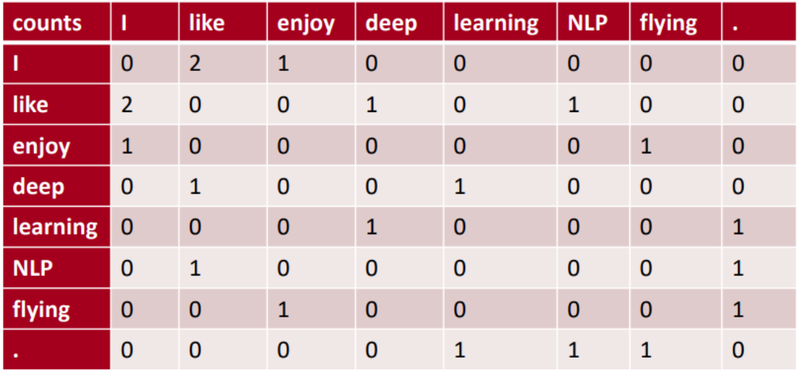


### 동시 등장 확률(Co-occurrence Probability)
---

동시 등장 확률 `P(k∣i)` : 동시 등장 행렬로부터 
- **특정 단어 i의 전체 등장 횟수를 카운트**하고, 
- **특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트**하여 계산한 
- **조건부 확률**입니다. 
- 이때 i를 중심 단어(center word), k를 주변 단어(context word) 라고 합니다.

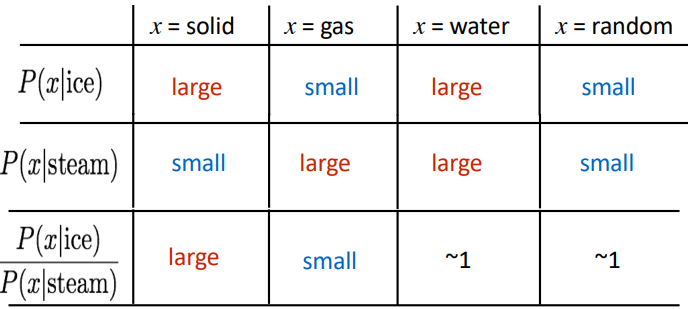

### GloVe의 손실 함수 설계하기
---

> GloVe idea:
>- 중심 단어 벡터와 주변 단어 벡터의 내적이 전체 코퍼스에서의 동시 등장 빈도의 로그값이 되도록 만드는 것
    ```
    dot(wi,wj) = logXij 가 되도록?
    ```
>- 전체 코퍼스에서의 `동시 등장 빈도의 로그값`과 `중심 단어 벡터와 주변 단어 벡터의 내적값의 차이`가 최소화되도록 두 벡터의 값을 학습하는 것

GloVe loss function : 
```
J = sigmasum(ij=1 ~ V)(f(Xij)(innerproduct(wi, wj) + bias - logXij)^2

- sigmasum(ij=1 ~ V) : 모든 단어 scan
- f(Xij) 

```

- `f(Xij)` : i 윈도우 내 j단어 등장 횟수를 1 이하로 나타낸 값, weighting function

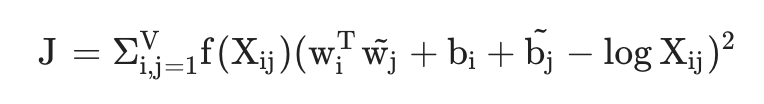
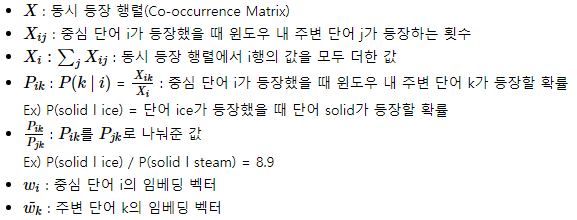
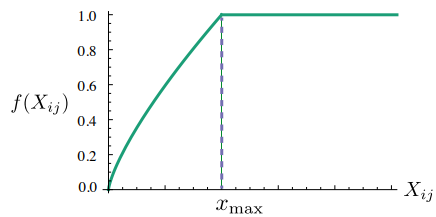


`f(Xik)`의 값이 작으면 함수의 값은 작아지고, 값이 크면 함수의 값은 커집니다. 

하지만 `f(Xik)`가 **큰 값**일 때 **지나친 가중치**를 주지 않기 위해 **함수의 최댓값이 1로** 정해져 있습니다. 

이는 'It is'와 같은 불용어의 동시 등장 빈도수가 높을 때 지나친 가중을 주지 않기 위함입니다.

### pre-trained GloVe 모델 실습

위에서도 언급했듯이 GloVe는 2014년에 개발되었고, 2015년에 1.2 버전이 나온 이후로는 관리되지 않고 있기 때문에 
- 최신 버전의 python에서는 GloVe를 설치하는 것이 불가능합니다. 

따라서 **pre-trained된 GloVe 모델**을 불러와서 간단한 실습을 해보겠습니다.

GloVe에는 4개의 데이터셋을 사용해 pre-trained된 word vector들이 있습니다.

- Common Crawl (42B tokens, 1.9M vocab, uncased, 300d vectors, 1.75 GB download)
- Common Crawl (840B tokens, 2.2M vocab, cased, 300d vectors, 2.03 GB download)
- Wikipedia 2014 + Gigaword 5 (6B tokens, 400K vocab, uncased, 300d vectors, 822 MB download)
- Twitter (2B tweets, 27B tokens, 1.2M vocab, uncased, 200d vectors, 1.42 GB download)

`gensim`을 이용해 pre-train된 Glove 모델을 간단히 불러올 수 있습니다. 여기서는 `'Wikipedia 2014 + Gigaword 5'` 데이터셋으로 학습된 모델을 불러오겠습니다.



In [11]:
import gensim.downloader as api
glove_model = api.load("glove-wiki-gigaword-50")  # glove vectors 다운로드
glove_model.most_similar("dog")  # 'dog'과 비슷한 단어 찾기

[==================================================] 100.0% 66.0/66.0MB downloaded


[('cat', 0.9218004941940308),
 ('dogs', 0.8513158559799194),
 ('horse', 0.7907583713531494),
 ('puppy', 0.7754920721054077),
 ('pet', 0.7724708318710327),
 ('rabbit', 0.7720814347267151),
 ('pig', 0.7490062117576599),
 ('snake', 0.7399188876152039),
 ('baby', 0.7395570278167725),
 ('bite', 0.7387937307357788)]

In [12]:
glove_model.most_similar('overacting')

[('impudence', 0.7842012047767639),
 ('puerile', 0.7816032767295837),
 ('winningly', 0.7644237875938416),
 ('grossness', 0.7576098442077637),
 ('deconstructions', 0.748936653137207),
 ('over-the-top', 0.7460805773735046),
 ('buffoonery', 0.746045708656311),
 ('impetuosity', 0.7415392398834229),
 ('sophomoric', 0.736961841583252),
 ('zaniness', 0.7353197336196899)]

In [13]:
glove_model.most_similar('memoryy')

KeyError: "Key 'memoryy' not present"

GloVe는 Word2Vec과 같이 OOV 문제를 가지고 있어서 'memoryy'라는 단어는 인식하지 못합니다. 

또한 pre-trained GloVe 모델은 한글이나 알파벳 대문자가 포함된 데이터셋으로 학습하지 않았기 때문에 

**알파벳 소문자만 인식**한다는 사실에 유의하세요!

---

## 7-12. 마무리하며
---


### Keyword

1. Vectorization
    1. BoW
    2. DTM
    3. TF-IDF
    4. One-Hot Encoding
2. One-Hot Encoding
    1. 그냥 구현
    2. keras 이용
3. Word Embedding
    1. NPLM
    2. Word2Vec
    3. FastText
    4. Glove
4. Word2Vec
    1. 분포 가설
    2. CBoW
    3. Skip-gram, Negative sampling -> CBoW 다중분류의 문제점을 이중분류문제로 바꿔서 해결
    4. OOV문제 ~ FastText
5. FastText
6. GloVe
    1. word embedding 접근법 두가지
        1. 카운트 기반 : DTM, LSA
        2. 예측 기반 : Word2Vec
        3. 둘 다 : GloVe
    2. Window based Co-occurrence Matrix
    3. Co-occurrence Probability
    4. GloVe loss function